# Data Exploration

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('datasets/dob_job_application_filings_subset.csv')

/home/kbaafi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# print head
df.head()

In [ ]:
# print tail
df.tail()

In [41]:
# print shape and columns
df.shape,df.columns

((12846, 83),
 Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
        'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
        'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
        'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
        'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
        'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
        'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
        'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
        'Applicant Professional Title', 'Applicant License #',
        'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
        'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
        'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
        'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
        'Enlargement SQ Footage', 'Street Frontage', 

In [ ]:
df.info()

## Exploratory Data Analysis

In [40]:
print(df.describe())

              Job #         Doc #         Block           Lot         Bin #  \
count  1.284600e+04  12846.000000  12846.000000  12846.000000  1.284600e+04   
mean   2.426788e+08      1.162930   2703.834735    623.303441  2.314997e+06   
std    1.312507e+08      0.514937   3143.002812   2000.934794  1.399062e+06   
min    1.036438e+08      1.000000      1.000000      0.000000  1.000003e+06   
25%    1.216206e+08      1.000000    836.000000     12.000000  1.035728e+06   
50%    2.202645e+08      1.000000   1411.500000     32.000000  2.004234e+06   
75%    3.208652e+08      1.000000   3355.000000     59.000000  3.343823e+06   
max    5.400246e+08      9.000000  99999.000000   9078.000000  5.864852e+06   

       Cluster  PC Filed  Existing Zoning Sqft  Proposed Zoning Sqft  \
count      0.0       0.0          1.284600e+04          1.284600e+04   
mean       NaN       NaN          1.439973e+03          2.007286e+03   
std        NaN       NaN          3.860757e+04          4.081570e+04   


### Frequency counts for categorical data

In [ ]:
# Print the value counts for 'Borough'
print("describing Borough field")
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print("\ndescribing State field")
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print("\ndescribing 'Site Fill' field")
print(df['Site Fill'].value_counts(dropna=False))

# Visual EDA

For numerical data, we can use to see the distribution of the data and that can help spot outliers

In [ ]:
# Describe the column
df['Existing Zoning Sqft'].describe()

In [ ]:
# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical.

In [44]:
df['initial_cost'] = df['Initial Cost'].apply(lambda x: float(x.replace('$','')))
df['total_est_fee'] = df['Total Est. Fee'].apply(lambda x: float(x.replace('$','')))

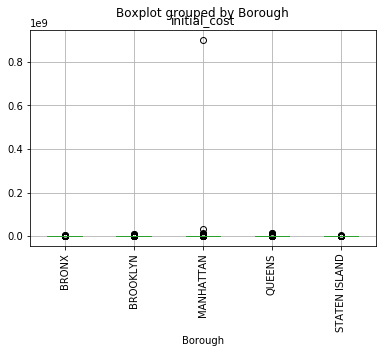

In [38]:
# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()

Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.

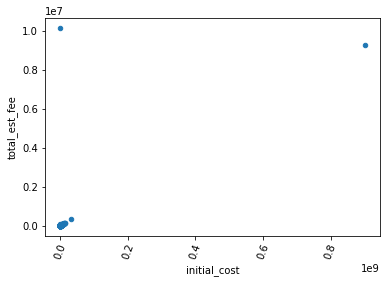

In [45]:
df.plot(kind="scatter", x="initial_cost", y="total_est_fee", rot=70)
plt.show()

As you can see there are two outliers. Lets remove them and see

In [46]:
df_subset = df[df.total_est_fee <= 20000]

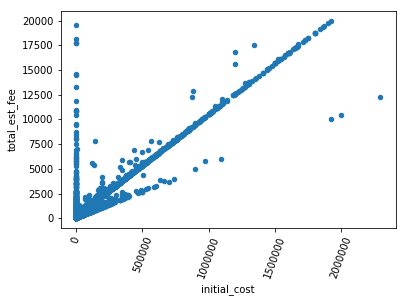

In [47]:
df_subset.plot(kind="scatter", x="initial_cost", y="total_est_fee", rot=70)
plt.show()

There seems to be a strong correlation between `initial_cost` and `total_est_fee`. In addition take note of large number of points that have an `initial_cost` of 0. It is difficult to infer trends from the earlier plot because it is dominated by outliers